### $$'Search\ Engine\ Dataset'$$

##### $$Released\ by\ Jakup\ Ymeraj$$

###### $$January\ 2025$$

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# Load Dataset
file_path = r"C:\Users\Perdorues\Downloads\Project_Datasets\Search_Engine_Dataset.xlsx"
data = pd.read_excel(file_path, sheet_name='Sheet1')

c:\Users\Perdorues\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [3]:
# Data Cleaning
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m')
data.set_index('Date', inplace=True)

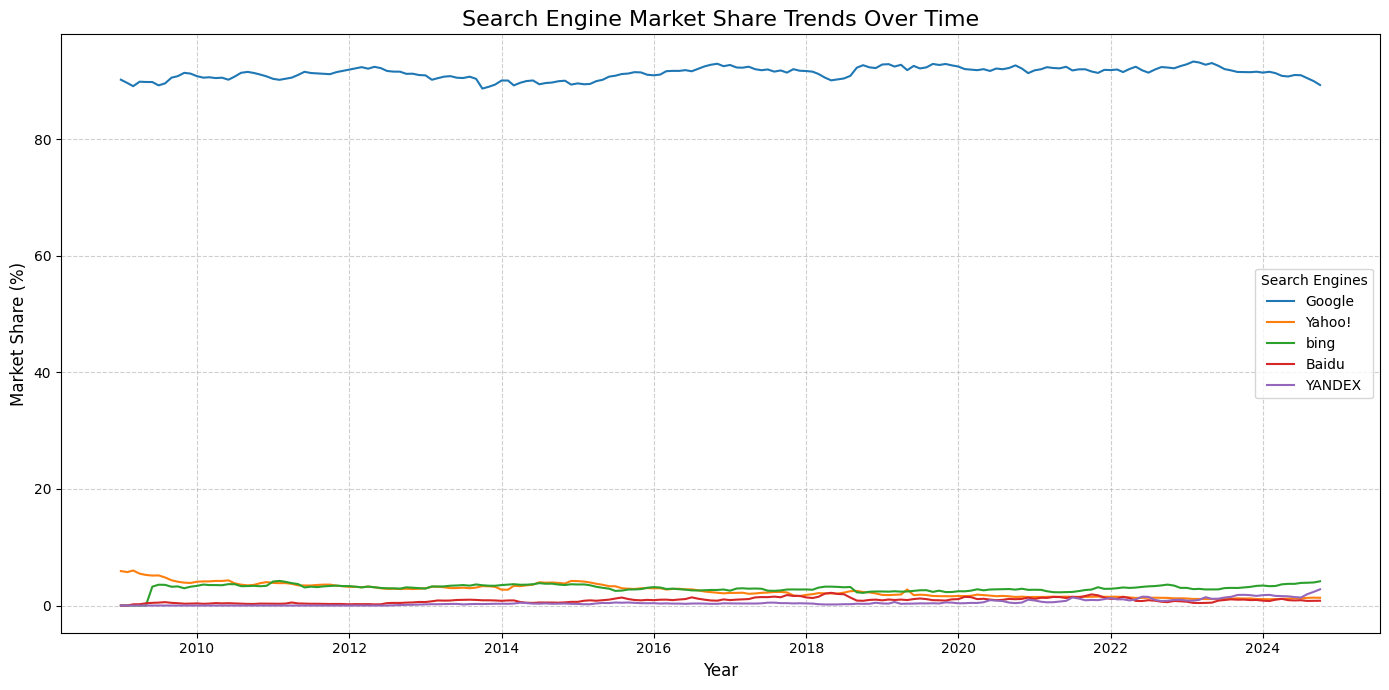

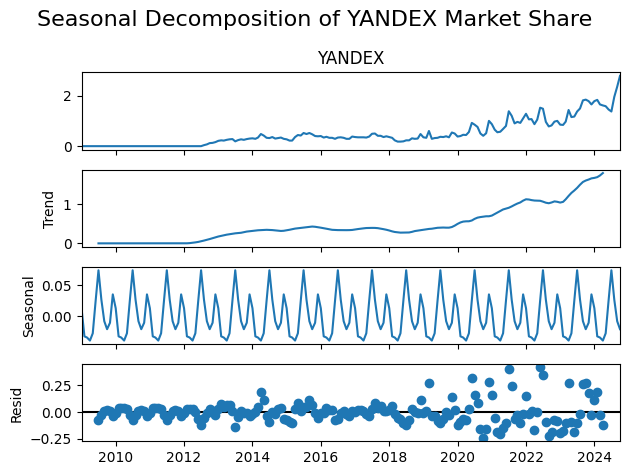

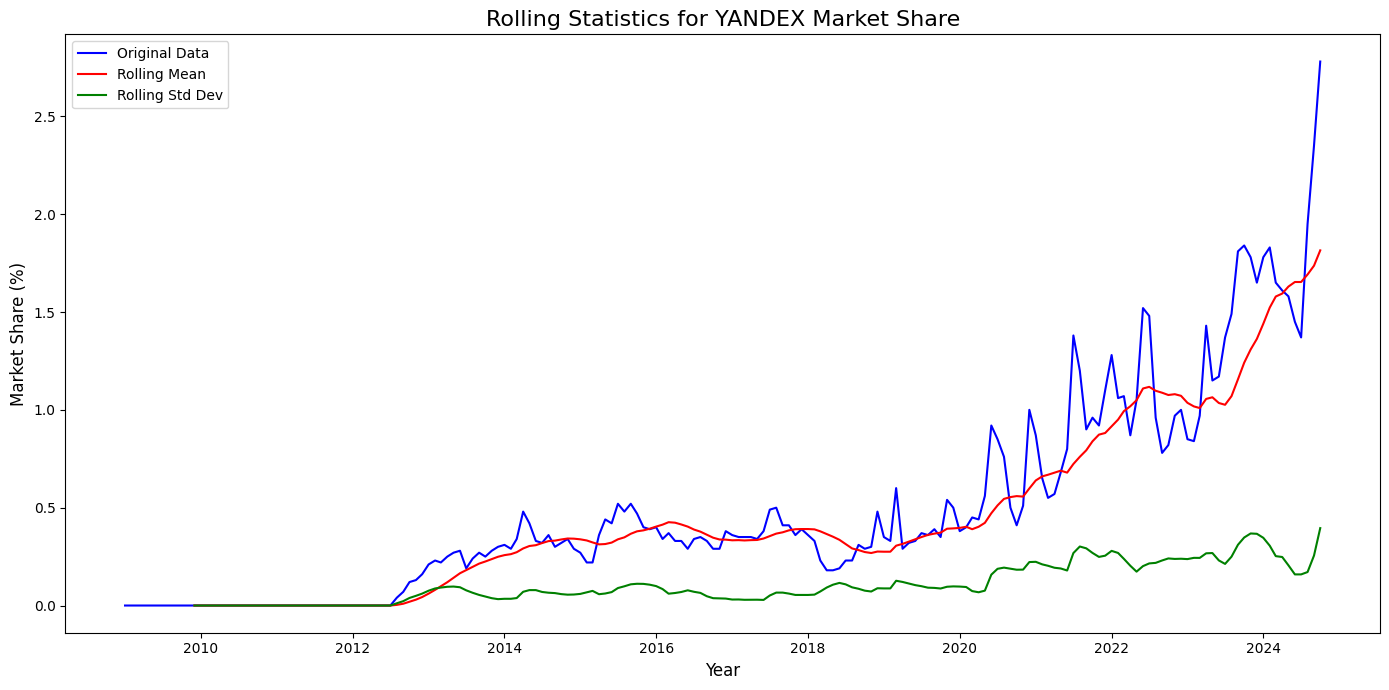

In [4]:
# Exploratory Data Analysis (EDA)
# Plotting Trends
major_engines = ['Google', 'Yahoo!', 'bing', 'Baidu', 'YANDEX']
plt.figure(figsize=(14, 7))
for engine in major_engines:
    plt.plot(data.index, data[engine], label=engine)
plt.title("Search Engine Market Share Trends Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Market Share (%)", fontsize=12)
plt.legend(title="Search Engines")
plt.grid(visible=True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# Use seasonal decomposition to break down the time series into trend, seasonality, and residual components.
result = seasonal_decompose(data[engine], model='additive')
result.plot()
plt.suptitle(f"Seasonal Decomposition of {engine} Market Share", fontsize=16)
plt.tight_layout()
plt.show()

# Show rolling statistics to analyze the stationarity of the time series.
rolling_mean = data[engine].rolling(window=12).mean()
rolling_std = data[engine].rolling(window=12).std()

plt.figure(figsize=(14, 7))
plt.plot(data.index, data[engine], label="Original Data", color="blue")
plt.plot(data.index, rolling_mean, label="Rolling Mean", color="red")
plt.plot(data.index, rolling_std, label="Rolling Std Dev", color="green")
plt.title(f"Rolling Statistics for {engine} Market Share", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Market Share (%)", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

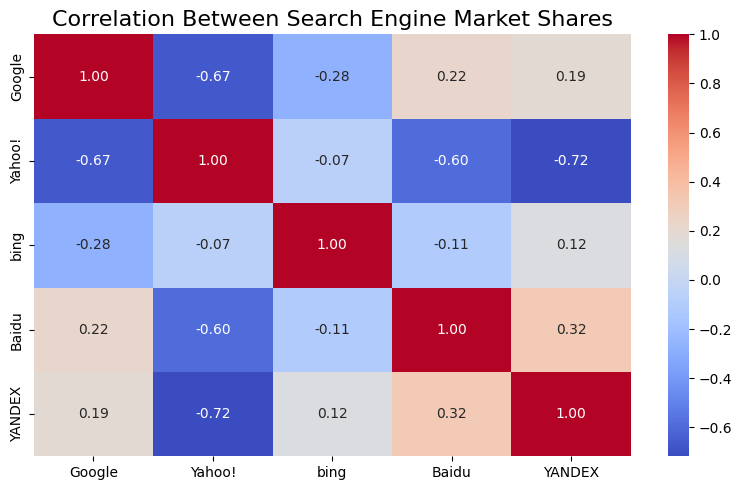

In [5]:
# Correlation Heatmap
plt.figure(figsize=(8, 5))
correlation_matrix = data[major_engines].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Search Engine Market Shares", fontsize=16)
plt.tight_layout()
plt.show()

In [6]:
# Feature Engineering
# Adding Lag Features and Moving Averages for Google
engine = 'Google'
data[f'{engine}_Lag_1'] = data[engine].shift(1)
data[f'{engine}_Lag_2'] = data[engine].shift(2)
data[f'{engine}_MA_3'] = data[engine].rolling(window=3).mean()
data[f'{engine}_MA_6'] = data[engine].rolling(window=6).mean()
data = data.dropna()  # Drop rows with NaN values introduced by lagging

In [7]:
# Splitting Data into Features and Target
X = data[[f'{engine}_Lag_1', f'{engine}_Lag_2', f'{engine}_MA_3', f'{engine}_MA_6']]
y = data[engine]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Predictive Modeling: Gradient Boosting Regressor
model = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

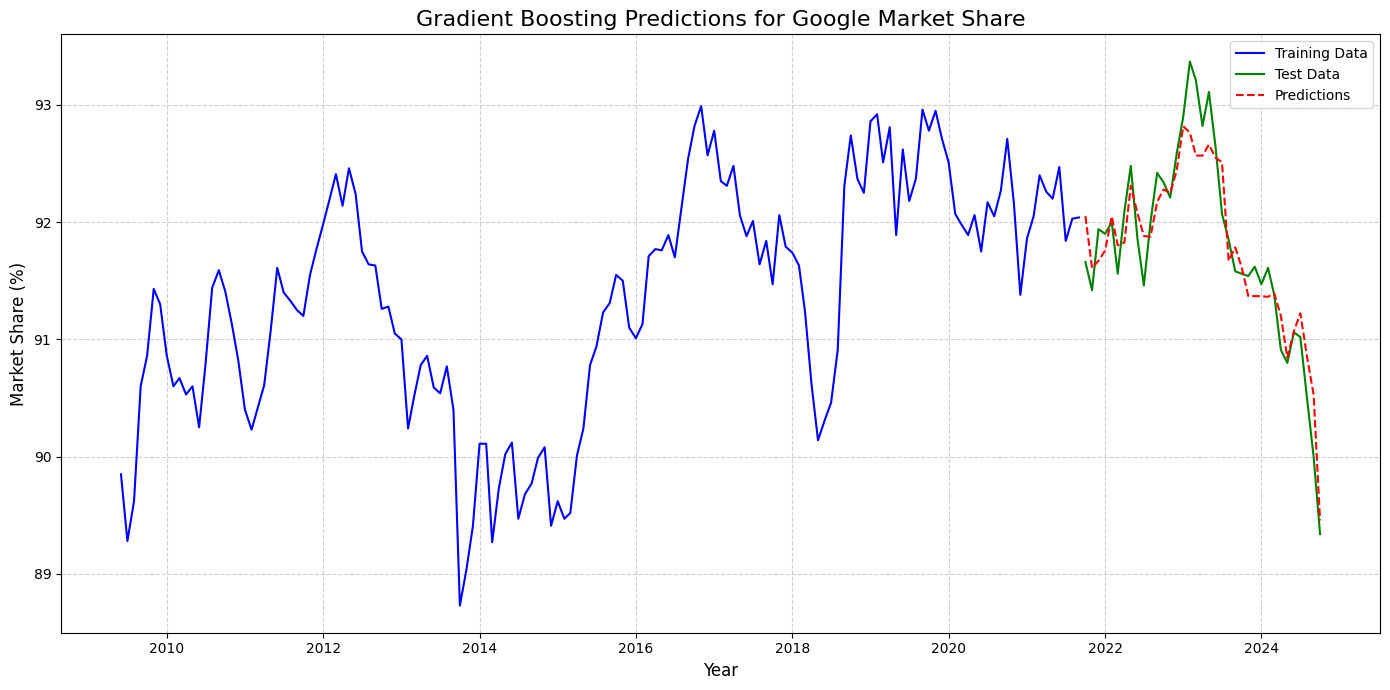

In [8]:
# Plot Predictions
plt.figure(figsize=(14, 7))
plt.plot(y_train.index, y_train, label="Training Data", color="blue")
plt.plot(y_test.index, y_test, label="Test Data", color="green")
plt.plot(y_test.index, predictions, label="Predictions", color="red", linestyle="--")
plt.title(f"Gradient Boosting Predictions for {engine} Market Share", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Market Share (%)", fontsize=12)
plt.legend()
plt.grid(visible=True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [9]:
# Metrics Output
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-Squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 0.2245
Root Mean Squared Error (RMSE): 0.2756
R-Squared (R²): 0.8923


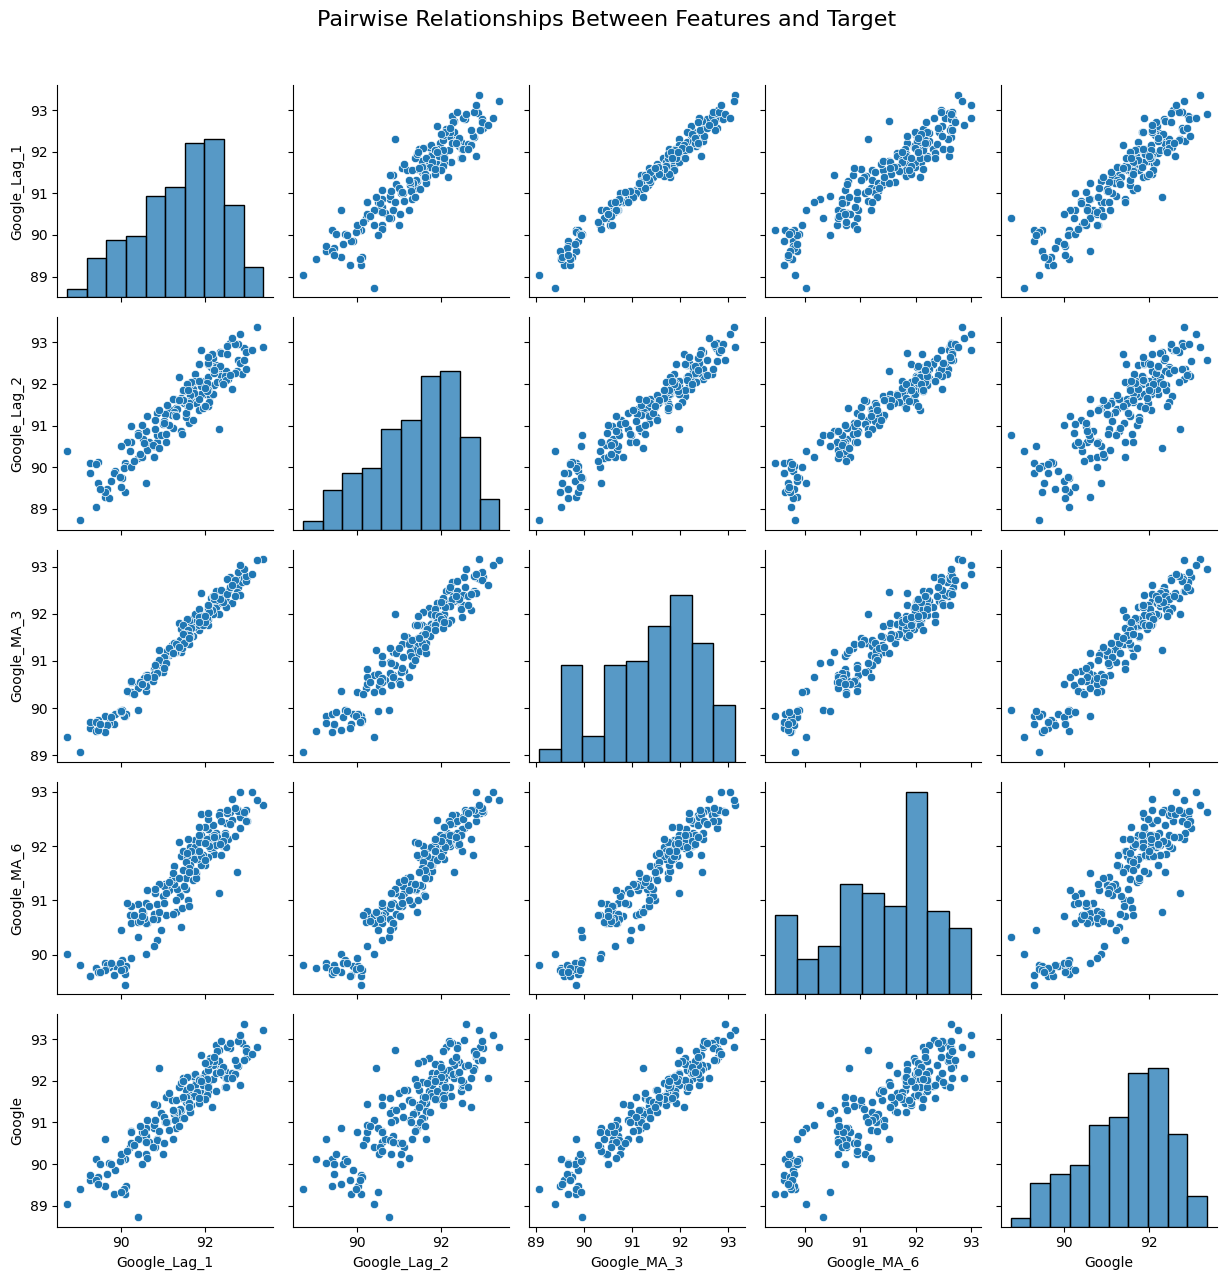

In [10]:
sns.pairplot(data[[f'{engine}_Lag_1', f'{engine}_Lag_2', f'{engine}_MA_3', f'{engine}_MA_6', engine]])
plt.suptitle("Pairwise Relationships Between Features and Target", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

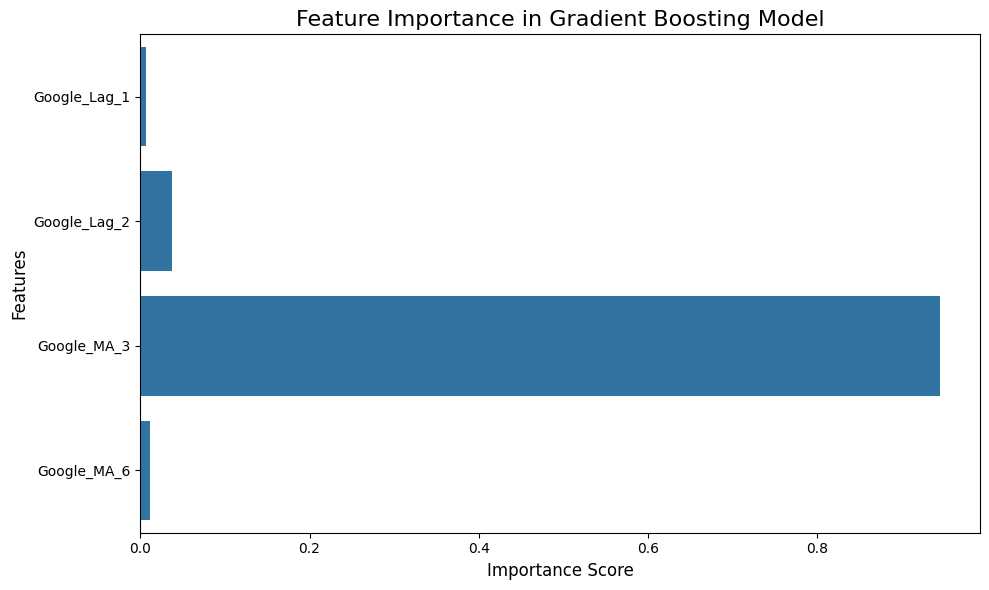

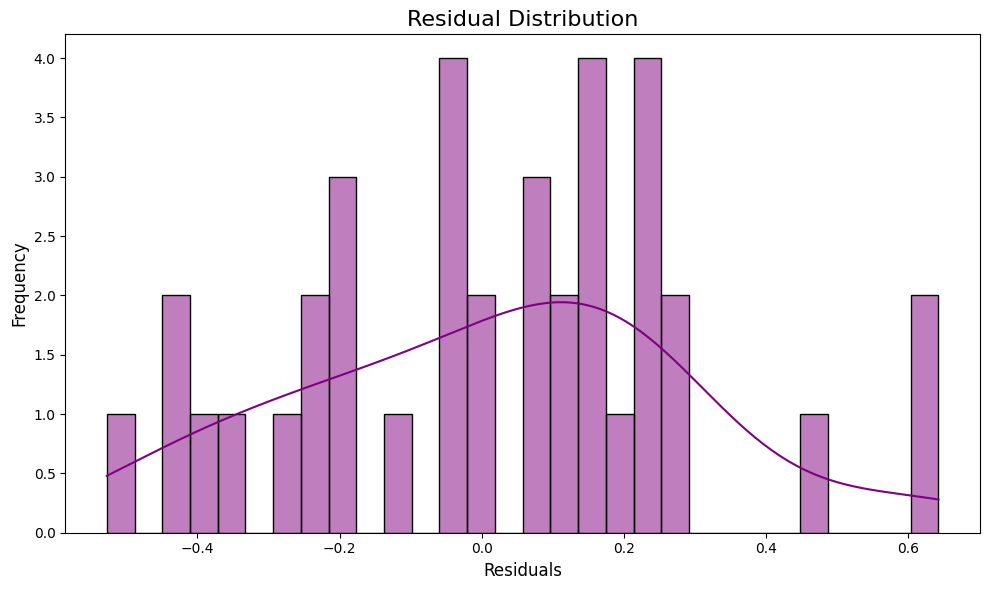

In [11]:
# Feature Importance
feature_importance = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X.columns)
plt.title("Feature Importance in Gradient Boosting Model", fontsize=16)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()


# Residuals plotting
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color="purple")
plt.title("Residual Distribution", fontsize=16)
plt.xlabel("Residuals", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

In [12]:
# Save Processed Data (Optional)
processed_file_path = r"C:\Users\Perdorues\Downloads\Project_Datasets\Search_Engine_Data.csv"
data.to_csv(processed_file_path)
print(f"Processed data saved to: {processed_file_path}")

Processed data saved to: C:\Users\Perdorues\Downloads\Project_Datasets\Search_Engine_Data.csv


file_path = r"C:\Users\Perdorues\Downloads\Project_Datasets\Search_Engine_Dataset.xlsx"


processed_file_path = r"C:\Users\Perdorues\Downloads\Project_Datasets\Search_Engine_Data.csv"